In [1]:
'''
Uses FPGA_Reshaper class to create binary files to be loaded to memory and text files to be loaded in testbenches.
'''

__author__ = "Abarajithan G"
__copyright__ = "Copyright 2019, Final Year Project"
__credits__ = ["Abarajithan G"]
__version__ = "1.0.0"
__maintainer__ = "Abarajthan G"
__email__ = "abarajithan07@gmail.com"
__status__ = "Research"

In [3]:
import pickle
import numpy as np
import sys
sys.path.append("../../yolov2_mod/")
sys.path.append("../../aba_framework/")
from yolov2_mod_numpy import YOLOv2_Modified_Numpy
from fpga_support import FPGA_Reshaper

Using TensorFlow backend.


In [25]:
yolo_mod_dict = pickle.load(open('yolov2_mod_dict.pickle','rb'))

In [26]:
yolo_mod_dict['conv_3'].weights = yolo_mod_dict['conv_3'].weights[:,:,:,0:1]

In [29]:
yolo_mod_dict['conv_3'].biases = yolo_mod_dict['conv_3'].biases[0:1]

In [32]:
yolo_mod_dict['conv_3'].np_out_data = yolo_mod_dict['conv_3'].np_out_data[:,:,:,0:1]

In [37]:
yolo_mod_dict['conv_4'].in_data = yolo_mod_dict['conv_3'].np_out_data

In [39]:
f = FPGA_Reshaper(model_dict = yolo_mod_dict,
                  num_cores=1, 
                  to_txt=True, 
                  to_bin=False,
                  all_bin=False,
                  conv_prefix='conv', 
                  max_prefix= 'maxpool',
                  activation_prefix = 'lrelu',
                  image_mem = [['0x81000000', '0x82000000'], ['0x83000000', '0x84000000']],
                  weights_mem = '0x89000000',
                  path = '../../../mem_yolo/'
                 )

In [41]:
i = 3
f.make_weights(i)
f.make_image(i)
f.make_image_out(i=i, next_max=False, to_txt=True, txt_float=False, to_pad=False)

3	3	False	(3, 3, 64, 1)        (1,)       (1, 192, 3)        (1,) 	(579,)         	1158
3


In [42]:
yolo_mod_dict['conv_3'].in_data.shape

(1, 64, 96, 64)

In [13]:
f.make_weights(20)

20	3	False	(3, 3, 1024, 1024)   (1024,)    (512, 3072, 6)     (1024,) 	(9440256,)     	18880512


array([ 0.000e+00,  0.000e+00, -1.979e-01, ..., -3.803e-03, -1.397e-03,
       -1.663e-05], dtype=float16)

In [14]:
f.make_image(20)

20


In [15]:
f.make_image_out(i=20, next_max=False, to_txt=True, txt_float=False, to_pad=False)

In [6]:
f.make_weights_all()

i	k	m	ker_orig             b_orig     ker_out            b_out 	weights_out 	weights_bytes
1	3	True	(3, 3, 3, 32)        (32,)      (32, 6, 6)         (32,) 	(1344,)        	2688
2	3	True	(3, 3, 32, 64)       (64,)      (64, 48, 6)        (64,) 	(18816,)       	37632
3	3	False	(3, 3, 64, 128)      (128,)     (64, 192, 6)       (128,) 	(74112,)       	148224
4	1	False	(1, 1, 128, 64)      (64,)      (11, 128, 6)       (11, 1, 6) 	(8514,)        	17028
5	3	True	(3, 3, 64, 128)      (128,)     (128, 96, 6)       (128,) 	(74496,)       	148992
6	3	False	(3, 3, 128, 256)     (256,)     (128, 384, 6)      (256,) 	(295680,)      	591360
7	1	False	(1, 1, 256, 128)     (128,)     (22, 256, 6)       (22, 1, 6) 	(33924,)       	67848
8	3	True	(3, 3, 128, 256)     (256,)     (256, 192, 6)      (256,) 	(296448,)      	592896
9	3	False	(3, 3, 256, 512)     (512,)     (256, 768, 6)      (512,) 	(1181184,)     	2362368
10	1	False	(1, 1, 512, 256)     (256,)     (43, 512, 6)       (43, 1, 6) 	(132354,)

In [7]:
f.weights_all.size

38765634

In [11]:
1344+18816+74112+8514+74496+295680+33924+296448+1181184+132354+1181184+132354+1182720+4721664+528900+4721664+528900+4721664+9440256+9440256+49200

38765634

In [13]:
77531268/4

19382817.0

In [8]:
yolo_mod_dict

{'input': <aba_framework.MyInput at 0x25dfb3e4518>,
 'conv_1': <aba_framework.MyConv at 0x25dfb3e4780>,
 'lrelu_1': <aba_framework.MyLeakyRelu at 0x25dfb3e4cc0>,
 'maxpool_1': <aba_framework.MyMaxPool at 0x25dfb3e4d68>,
 'conv_2': <aba_framework.MyConv at 0x25dfb3e4e10>,
 'lrelu_2': <aba_framework.MyLeakyRelu at 0x25dfb3f2278>,
 'maxpool_2': <aba_framework.MyMaxPool at 0x25dfb3f22e8>,
 'conv_3': <aba_framework.MyConv at 0x25dfb3f2390>,
 'lrelu_3': <aba_framework.MyLeakyRelu at 0x25dfb3f27b8>,
 'conv_4': <aba_framework.MyConv at 0x25dfb3f2860>,
 'lrelu_4': <aba_framework.MyLeakyRelu at 0x25dfb3f2c88>,
 'conv_5': <aba_framework.MyConv at 0x25dfb3f2d30>,
 'lrelu_5': <aba_framework.MyLeakyRelu at 0x25dfb3f6198>,
 'maxpool_5': <aba_framework.MyMaxPool at 0x25dfb3f6208>,
 'conv_6': <aba_framework.MyConv at 0x25dfb3f62b0>,
 'lrelu_6': <aba_framework.MyLeakyRelu at 0x25dfb3f66d8>,
 'conv_7': <aba_framework.MyConv at 0x25dfb3f6780>,
 'lrelu_7': <aba_framework.MyLeakyRelu at 0x25dfb3f6ba8>,
 'co

In [5]:
f.make_commands_all()

In [8]:
# for i in range(1,22):
#     if i != 3:
#         f.compare(i)

In [61]:
for i in range(1,22):
    f.compare(i)

Comparing output of 1 to input of 2 (maxpool).
Mean square error:  7.903575897216797e-06
Comparing output of 2 to input of 3 (not maxpool).
Mean square error:  5.896886189778646e-05
Comparing output of 3 to input of 4 (not maxpool).
Mean square error:  6.0049692789713543e-05
Comparing output of 4 to input of 5 (maxpool).
Mean square error:  2.678235371907552e-05
Comparing output of 5 to input of 6 (not maxpool).
Mean square error:  5.3151448567708334e-05
Comparing output of 6 to input of 7 (not maxpool).
Mean square error:  4.23431396484375e-05
Comparing output of 7 to input of 8 (maxpool).
Mean square error:  2.6194254557291665e-05
Comparing output of 8 to input of 9 (not maxpool).
Mean square error:  4.253387451171875e-05
Comparing output of 9 to input of 10 (not maxpool).
Mean square error:  2.544720967610677e-05
Comparing output of 10 to input of 11 (not maxpool).
Mean square error:  1.2389818827311198e-05
Comparing output of 11 to input of 12 (not maxpool).
Mean square error:  2.9

In [9]:
with open('cores/mem_bin/21_out.bin', 'rb') as file:
    out = file.read()
    
out = np.frombuffer(out, np.float16).reshape(12,45,10)
out = out[:,:,1:9]
out = out.transpose((2,0,1))
out = out.reshape((1,8,12,45))

In [10]:
yolo_mod = None
yolo_mod = YOLO_mod_Numpy(np_dtype=np.float16,
                 input_W=384,
                 input_H=256,
                 image_path='9_in.png',
                 image=None,
                 weights_path='YOLOv2_modified_trained_merged.h5')
yolo_mod.model.d['conv_21'].np_out_data = out
yolo_mod.output = out

D:\FYP\nn\yolov2\yolo_mod\utils.py:223: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


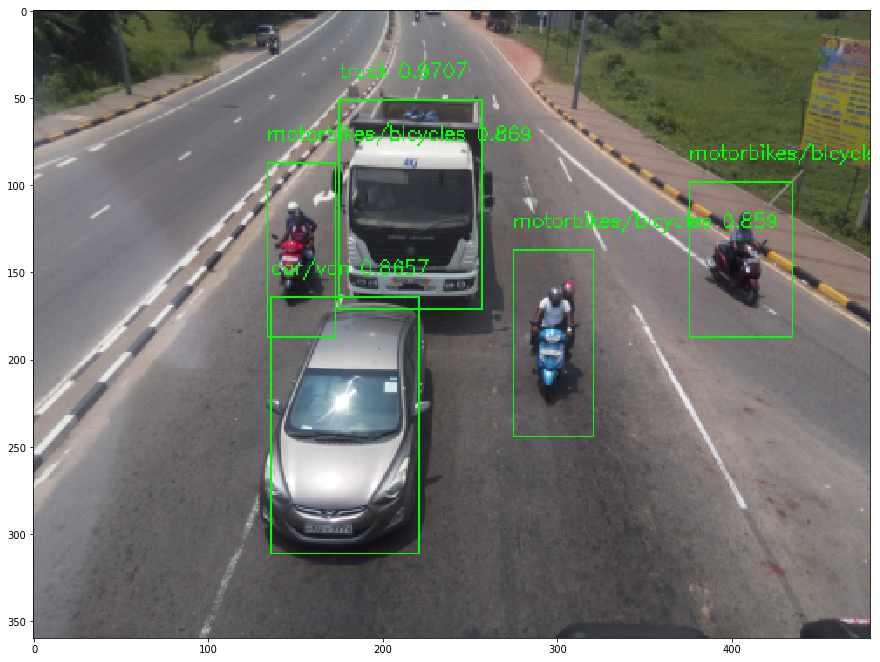

In [11]:
yolo_mod.show_on_image()

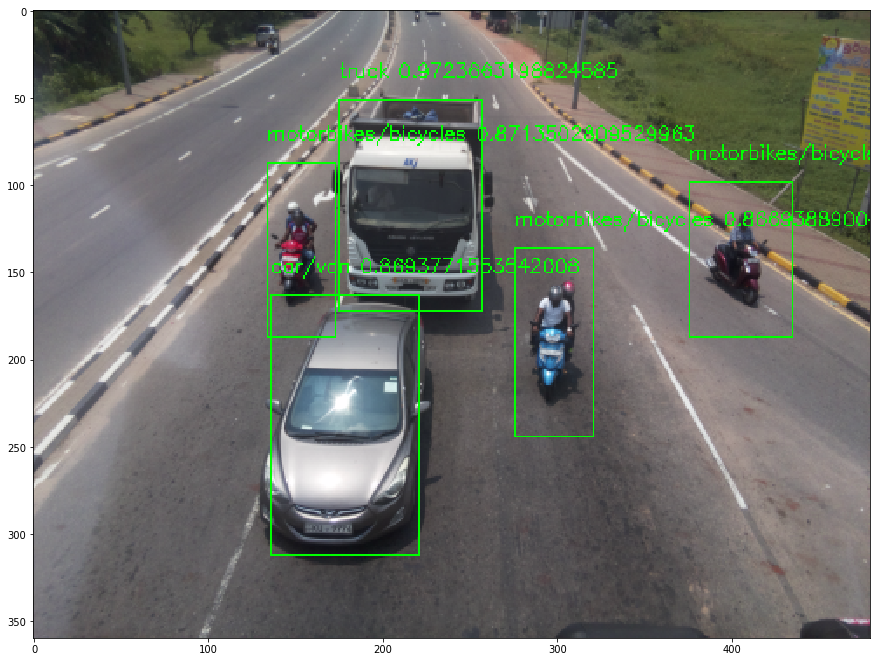

In [16]:
yolo_mod_numpy.show_on_image()

In [14]:
yolo_mod_numpy = YOLO_mod_Numpy(np_dtype=np.float64,
                 input_W=384,
                 input_H=256,
                 image_path='9_in.png',
                 image=None,
                 weights_path='YOLOv2_modified_trained_merged.h5')

In [15]:
yolo_mod_numpy.fwd_pass()

Numpy Evaluated Layer: conv_1
Numpy Evaluated Layer: lrelu_1
Numpy Evaluated Layer: maxpool_1
Numpy Evaluated Layer: conv_2
Numpy Evaluated Layer: lrelu_2
Numpy Evaluated Layer: maxpool_2
Numpy Evaluated Layer: conv_3
Numpy Evaluated Layer: lrelu_3
Numpy Evaluated Layer: conv_4
Numpy Evaluated Layer: lrelu_4
Numpy Evaluated Layer: conv_5
Numpy Evaluated Layer: lrelu_5
Numpy Evaluated Layer: maxpool_5
Numpy Evaluated Layer: conv_6
Numpy Evaluated Layer: lrelu_6
Numpy Evaluated Layer: conv_7
Numpy Evaluated Layer: lrelu_7
Numpy Evaluated Layer: conv_8
Numpy Evaluated Layer: lrelu_8
Numpy Evaluated Layer: maxpool_8
Numpy Evaluated Layer: conv_9
Numpy Evaluated Layer: lrelu_9
Numpy Evaluated Layer: conv_10
Numpy Evaluated Layer: lrelu_10
Numpy Evaluated Layer: conv_11
Numpy Evaluated Layer: lrelu_11
Numpy Evaluated Layer: conv_12
Numpy Evaluated Layer: lrelu_12
Numpy Evaluated Layer: conv_13
Numpy Evaluated Layer: lrelu_13
Numpy Evaluated Layer: maxpool_13
Numpy Evaluated Layer: conv_14
Nu

In [17]:
yolo_mod_numpy_day = YOLO_mod_Numpy(np_dtype=np.float16,
                 input_W=384,
                 input_H=256,
                 image_path='a.jpg',
                 image=None,
                 weights_path='YOLOv2_modified_trained_merged.h5')

In [18]:
yolo_mod_numpy_day.fwd_pass()

Numpy Evaluated Layer: conv_1
Numpy Evaluated Layer: lrelu_1
Numpy Evaluated Layer: maxpool_1
Numpy Evaluated Layer: conv_2
Numpy Evaluated Layer: lrelu_2
Numpy Evaluated Layer: maxpool_2
Numpy Evaluated Layer: conv_3
Numpy Evaluated Layer: lrelu_3
Numpy Evaluated Layer: conv_4
Numpy Evaluated Layer: lrelu_4
Numpy Evaluated Layer: conv_5
Numpy Evaluated Layer: lrelu_5
Numpy Evaluated Layer: maxpool_5
Numpy Evaluated Layer: conv_6
Numpy Evaluated Layer: lrelu_6
Numpy Evaluated Layer: conv_7
Numpy Evaluated Layer: lrelu_7
Numpy Evaluated Layer: conv_8
Numpy Evaluated Layer: lrelu_8
Numpy Evaluated Layer: maxpool_8
Numpy Evaluated Layer: conv_9
Numpy Evaluated Layer: lrelu_9
Numpy Evaluated Layer: conv_10
Numpy Evaluated Layer: lrelu_10
Numpy Evaluated Layer: conv_11
Numpy Evaluated Layer: lrelu_11
Numpy Evaluated Layer: conv_12
Numpy Evaluated Layer: lrelu_12
Numpy Evaluated Layer: conv_13
Numpy Evaluated Layer: lrelu_13
Numpy Evaluated Layer: maxpool_13
Numpy Evaluated Layer: conv_14
Nu

In [19]:
f_day = FPGA_Reshaper(model_dict = yolo_mod_numpy_day.model.d,
                  num_cores=2, 
                  to_txt=False, 
                  to_bin=True,
                  all_bin=True,
                  conv_prefix='conv', 
                  max_prefix= 'maxpool',
                  activation_prefix = 'lrelu',
                  image_mem = [['0x81000000', '0x82000000'], ['0x83000000', '0x84000000']],
                  weights_mem = '0x89000000',
                  path = 'D:/FYP/nn/yolov2/yolo_mod/cores_day/'
                 )
f_day.make_image(1)

In [20]:
f_day.make_image(1)

1


In [21]:
f_day.compare(21)

Comparing output of 21 to output of 21 (not maxpool)
Mean square error:  0.0018475115740740741


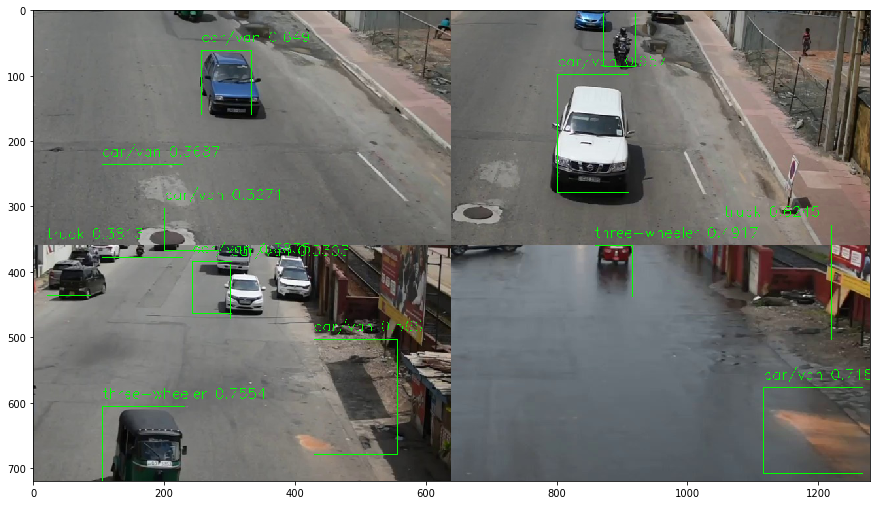

In [27]:
with open('cores_day/mem_bin/21_out.bin', 'rb') as file:
    out = file.read()
    
out = np.frombuffer(out, np.float16).reshape(12,45,10)
out = out[:,:,1:9]
out = out.transpose((2,0,1))
out = out.reshape((1,8,12,45))

yolo_mod_fpga = None
yolo_mod_fpga = YOLO_mod_Numpy(np_dtype=np.float16,
                 input_W=384,
                 input_H=256,
                 image_path='a.jpg',
                 image=None,
                 weights_path='YOLOv2_modified_trained_merged.h5')
yolo_mod_fpga.model.d['conv_21'].np_out_data = out
yolo_mod_fpga.output = out
yolo_mod_fpga.show_on_image()

In [29]:
yolo_mod_numpy_night = YOLO_mod_Numpy(np_dtype=np.float16,
                 input_W=384,
                 input_H=256,
                 image_path='b.jpg',
                 image=None,
                 weights_path='YOLOv2_modified_trained_merged.h5')
yolo_mod_numpy_night.fwd_pass()

Numpy Evaluated Layer: conv_1
Numpy Evaluated Layer: lrelu_1
Numpy Evaluated Layer: maxpool_1
Numpy Evaluated Layer: conv_2
Numpy Evaluated Layer: lrelu_2
Numpy Evaluated Layer: maxpool_2
Numpy Evaluated Layer: conv_3
Numpy Evaluated Layer: lrelu_3
Numpy Evaluated Layer: conv_4
Numpy Evaluated Layer: lrelu_4
Numpy Evaluated Layer: conv_5
Numpy Evaluated Layer: lrelu_5
Numpy Evaluated Layer: maxpool_5
Numpy Evaluated Layer: conv_6
Numpy Evaluated Layer: lrelu_6
Numpy Evaluated Layer: conv_7
Numpy Evaluated Layer: lrelu_7
Numpy Evaluated Layer: conv_8
Numpy Evaluated Layer: lrelu_8
Numpy Evaluated Layer: maxpool_8
Numpy Evaluated Layer: conv_9
Numpy Evaluated Layer: lrelu_9
Numpy Evaluated Layer: conv_10
Numpy Evaluated Layer: lrelu_10
Numpy Evaluated Layer: conv_11
Numpy Evaluated Layer: lrelu_11
Numpy Evaluated Layer: conv_12
Numpy Evaluated Layer: lrelu_12
Numpy Evaluated Layer: conv_13
Numpy Evaluated Layer: lrelu_13
Numpy Evaluated Layer: maxpool_13
Numpy Evaluated Layer: conv_14
Nu

In [30]:
f_day = FPGA_Reshaper(model_dict = yolo_mod_numpy_night.model.d,
                  num_cores=2, 
                  to_txt=False, 
                  to_bin=True,
                  all_bin=True,
                  conv_prefix='conv', 
                  max_prefix= 'maxpool',
                  activation_prefix = 'lrelu',
                  image_mem = [['0x81000000', '0x82000000'], ['0x83000000', '0x84000000']],
                  weights_mem = '0x89000000',
                  path = 'D:/FYP/nn/yolov2/yolo_mod/cores_night/'
                 )
f_day.make_image(1)

1


D:\FYP\nn\yolov2\yolo_mod\utils.py:223: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


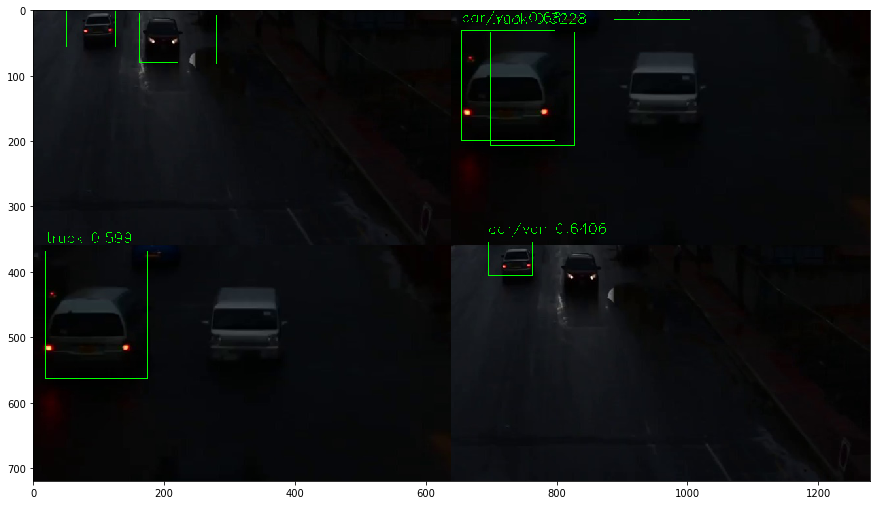

In [31]:
with open('cores_night/mem_bin/21_out.bin', 'rb') as file:
    out = file.read()
    
out = np.frombuffer(out, np.float16).reshape(12,45,10)
out = out[:,:,1:9]
out = out.transpose((2,0,1))
out = out.reshape((1,8,12,45))

yolo_mod_fpga = None
yolo_mod_fpga = YOLO_mod_Numpy(np_dtype=np.float16,
                 input_W=384,
                 input_H=256,
                 image_path='b.jpg',
                 image=None,
                 weights_path='YOLOv2_modified_trained_merged.h5')
yolo_mod_fpga.model.d['conv_21'].np_out_data = out
yolo_mod_fpga.output = out
yolo_mod_fpga.show_on_image(OBJ_THRESHOLD=0.1)

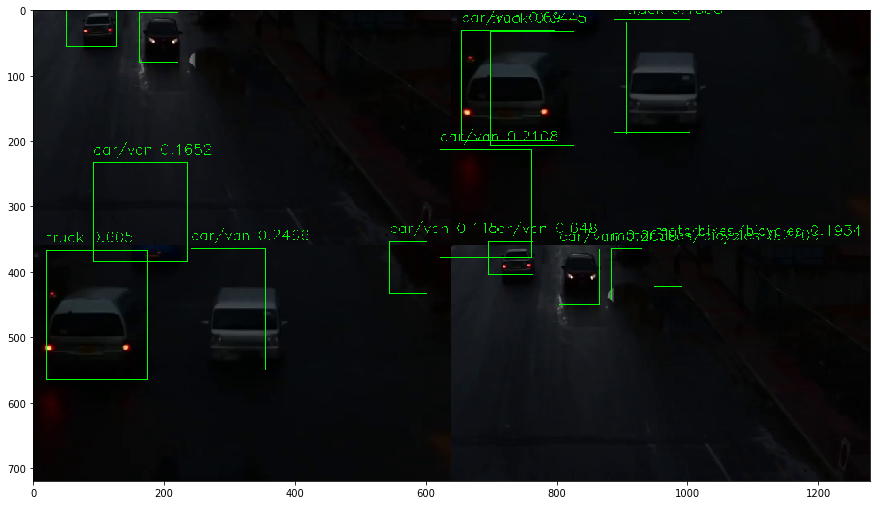

In [36]:
yolo_mod_numpy_night.show_on_image(OBJ_THRESHOLD=0.1)

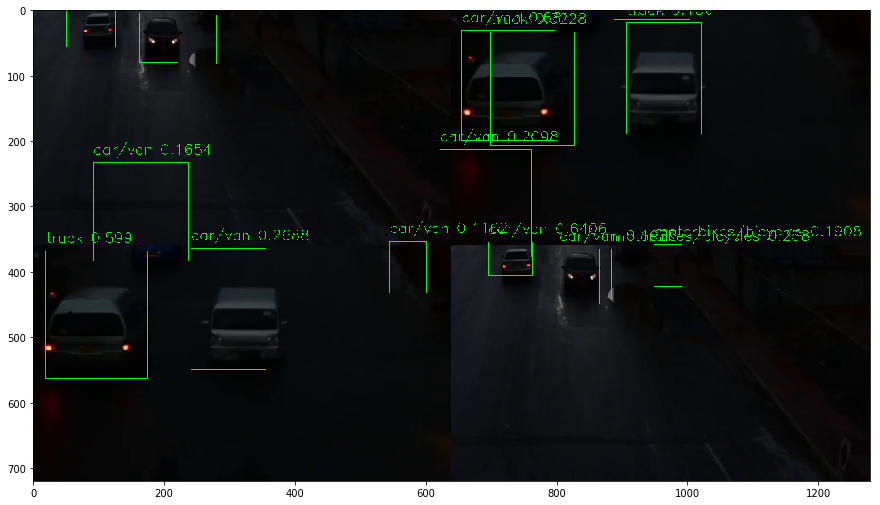

In [37]:
yolo_mod_fpga.show_on_image(OBJ_THRESHOLD=0.1)